# Zadanie zaliczeniowe z przedmiotu "**Uczenie Maszynowe**"
---

- **autor:** Adrian Nafalski
- **nr_indeksu:** 303831

---

# Import potrzebnych bibliotek

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

# Odczyt i analiza danych

In [37]:
# Wczytanie danych
df = pd.read_csv("weather.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2008-10-27,Canberra,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,2008-10-28,Canberra,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,2008-10-29,Canberra,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,2008-10-30,Canberra,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No


In [38]:
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [39]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           366 non-null    object 
 1   Location       366 non-null    object 
 2   MinTemp        366 non-null    float64
 3   MaxTemp        366 non-null    float64
 4   Rainfall       366 non-null    float64
 5   Evaporation    366 non-null    float64
 6   Sunshine       363 non-null    float64
 7   WindGustDir    363 non-null    object 
 8   WindGustSpeed  364 non-null    float64
 9   WindDir9am     335 non-null    object 
 10  WindDir3pm     365 non-null    object 
 11  WindSpeed9am   359 non-null    float64
 12  WindSpeed3pm   366 non-null    int64  
 13  Humidity9am    366 non-null    int64  
 14  Humidity3pm    366 non-null    int64  
 15  Pressure9am    366 non-null    float64
 16  Pressure3pm    366 non-null    float64
 17  Cloud9am       366 non-null    int64  
 18  Cloud3pm  

In [41]:
df.shape

(366, 24)

In [42]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [43]:
df.corr()

<ipython-input-43-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1.000000,0.752471,0.201939,0.649930,0.035711,0.218020,0.127542,-0.065922,-0.207897,-0.040709,-0.501707,-0.498007,0.215776,0.118397,0.916745,0.722730,0.218551
MaxTemp,0.752471,1.000000,-0.073560,0.690026,0.452064,0.109672,-0.216814,-0.167873,-0.359602,-0.533327,-0.290883,-0.379394,-0.175730,-0.135991,0.870604,0.989261,0.027557
Rainfall,0.201939,-0.073560,1.000000,-0.007293,-0.150990,0.096190,0.219637,0.056008,0.150109,0.289013,-0.331581,-0.250218,0.180046,0.127792,0.077299,-0.087493,0.089860
Evaporation,0.649930,0.690026,-0.007293,1.000000,0.318025,0.288477,0.068929,0.048601,-0.519587,-0.391780,-0.381906,-0.391093,-0.106007,-0.100045,0.707676,0.671632,0.076762
Sunshine,0.035711,0.452064,-0.150990,0.318025,1.000000,0.095843,-0.064522,0.072573,-0.499017,-0.759429,0.006276,-0.036201,-0.681092,-0.661131,0.219509,0.470447,-0.378823
WindGustSpeed,0.218020,0.109672,0.096190,0.288477,0.095843,1.000000,0.527653,0.693945,-0.349793,-0.069439,-0.540180,-0.526885,-0.012666,0.050230,0.256223,0.072501,0.251991
WindSpeed9am,0.127542,-0.216814,0.219637,0.068929,-0.064522,0.527653,1.000000,0.472966,-0.270623,0.146657,-0.356332,-0.247952,0.101842,-0.022471,0.064074,-0.235186,0.039091
WindSpeed3pm,-0.065922,-0.167873,0.056008,0.048601,0.072573,0.693945,0.472966,1.000000,-0.266092,-0.026368,-0.359800,-0.337325,-0.026426,0.007207,-0.017766,-0.187570,-0.009447
Humidity9am,-0.207897,-0.359602,0.150109,-0.519587,-0.499017,-0.349793,-0.270623,-0.266092,1.000000,0.546718,0.135727,0.134420,0.392842,0.271938,-0.436551,-0.355119,0.165931
Humidity3pm,-0.040709,-0.533327,0.289013,-0.391780,-0.759429,-0.069439,0.146657,-0.026368,0.546718,1.000000,-0.087946,-0.010052,0.551633,0.510108,-0.255681,-0.581676,0.358752


# Przygotowanie Danych

In [44]:
# Sprawdzenie brakujących danych
round(df.isna().sum() / len(df), 3)

Date             0.000
Location         0.000
MinTemp          0.000
MaxTemp          0.000
Rainfall         0.000
Evaporation      0.000
Sunshine         0.008
WindGustDir      0.008
WindGustSpeed    0.005
WindDir9am       0.085
WindDir3pm       0.003
WindSpeed9am     0.019
WindSpeed3pm     0.000
Humidity9am      0.000
Humidity3pm      0.000
Pressure9am      0.000
Pressure3pm      0.000
Cloud9am         0.000
Cloud3pm         0.000
Temp9am          0.000
Temp3pm          0.000
RainToday        0.000
RISK_MM          0.000
RainTomorrow     0.000
dtype: float64

In [45]:
# Obsługa brakujących wartości
df = df.drop(['RainToday', 'RISK_MM'], axis=1)
df = df.dropna()

In [46]:
# Sprawdzenie brakujących danych
round(df.isna().sum() / len(df), 3)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainTomorrow     0.0
dtype: float64

In [47]:
df.RainTomorrow = df.RainTomorrow.map({'No': 0, 'Yes': 1})
df.RainTomorrow.value_counts(normalize=True)

0    0.817073
1    0.182927
Name: RainTomorrow, dtype: float64

In [48]:
df_imputed = df.dropna(axis=0, subset=['RainTomorrow'])
df_imputed.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainTomorrow     0
dtype: int64

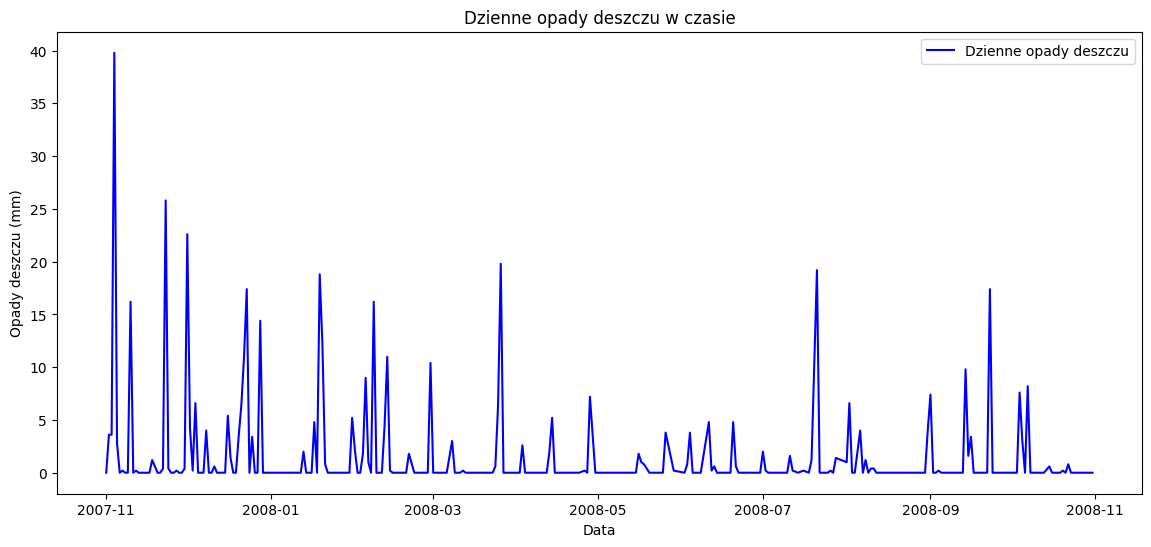

In [49]:
# Konwersja kolumny z datą
df['Date'] = pd.to_datetime(df['Date'])

# Wykres liniowy przedstawiający dzienne opady deszczu
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Rainfall'], label='Dzienne opady deszczu', color='b')
plt.title('Dzienne opady deszczu w czasie')
plt.xlabel('Data')
plt.ylabel('Opady deszczu (mm)')
plt.legend()
plt.show()

In [50]:
# Wybór atrybutów i zmiennej celu
features = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'WindSpeed3pm']]
target = df['RainTomorrow']

# Histogramy

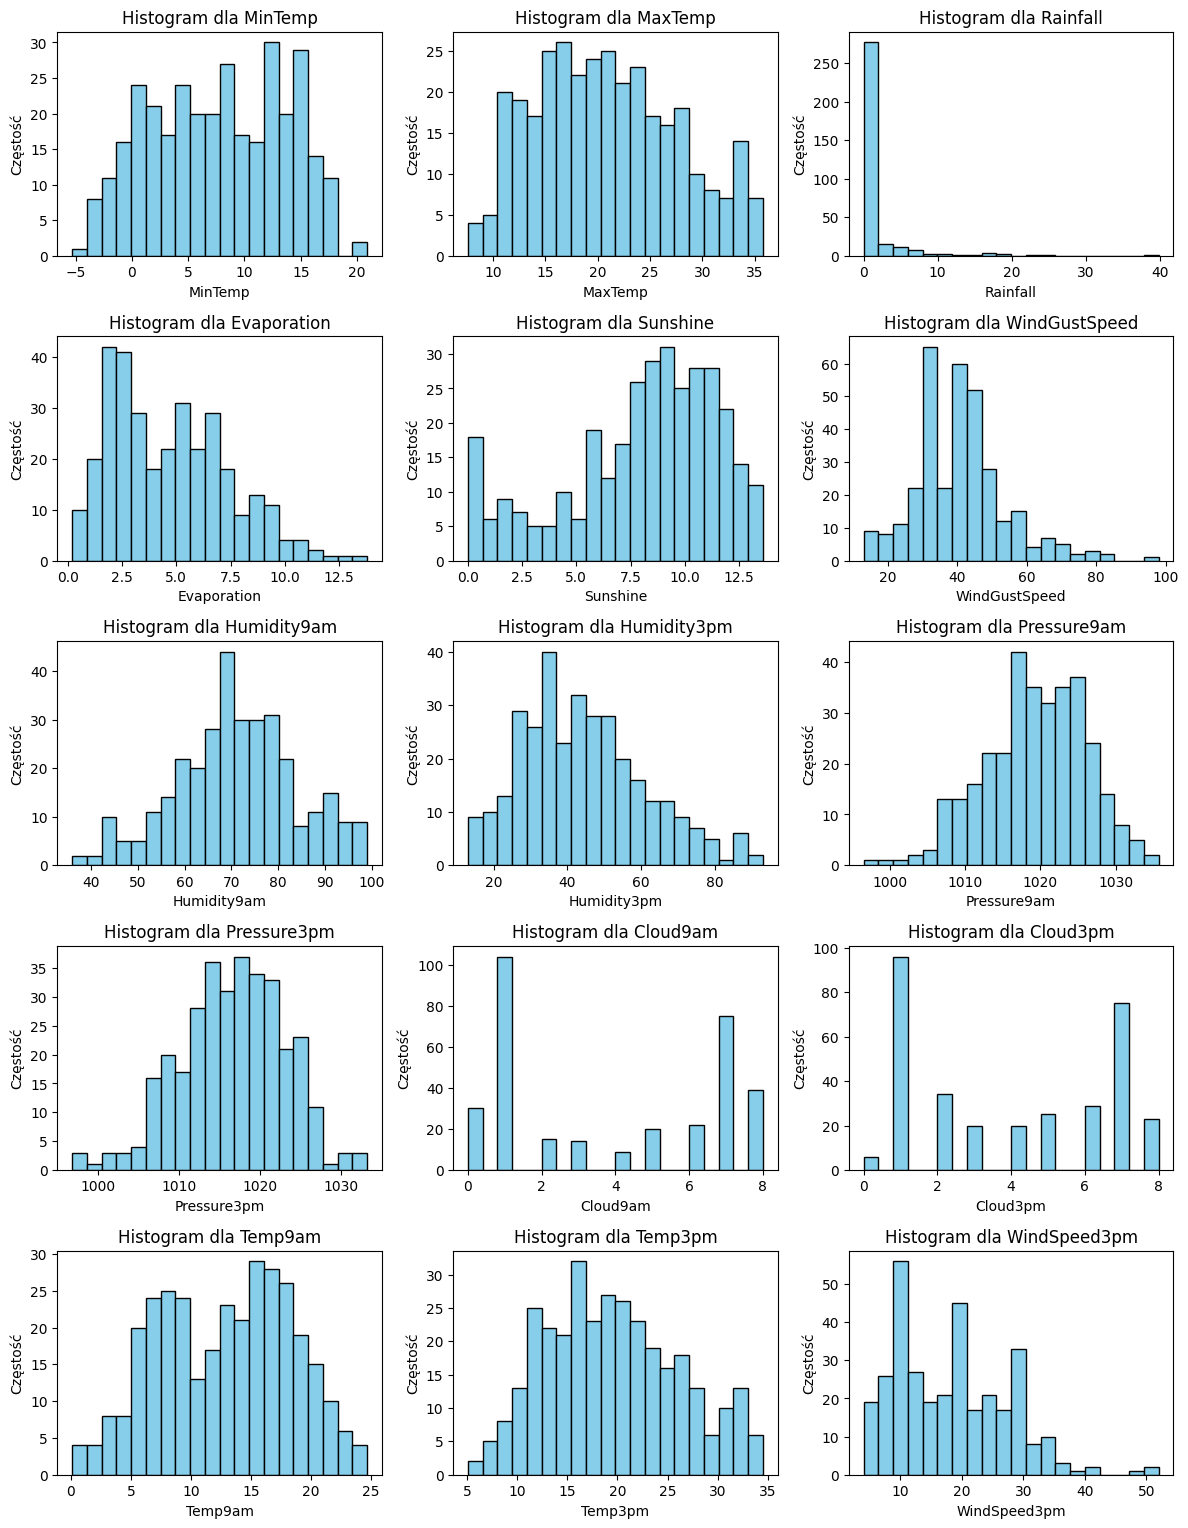

In [51]:
plt.figure(figsize=(12, 18))
for i, col in enumerate(features.columns):
    plt.subplot(6, 3, i + 1)
    plt.hist(features[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram dla {col}')
    plt.xlabel(col)
    plt.ylabel('Częstość')

plt.tight_layout()
plt.show()

# Macierz korelacji

In [52]:
# Analiza korelacji między zmiennymi
correlation_matrix = features.corr()

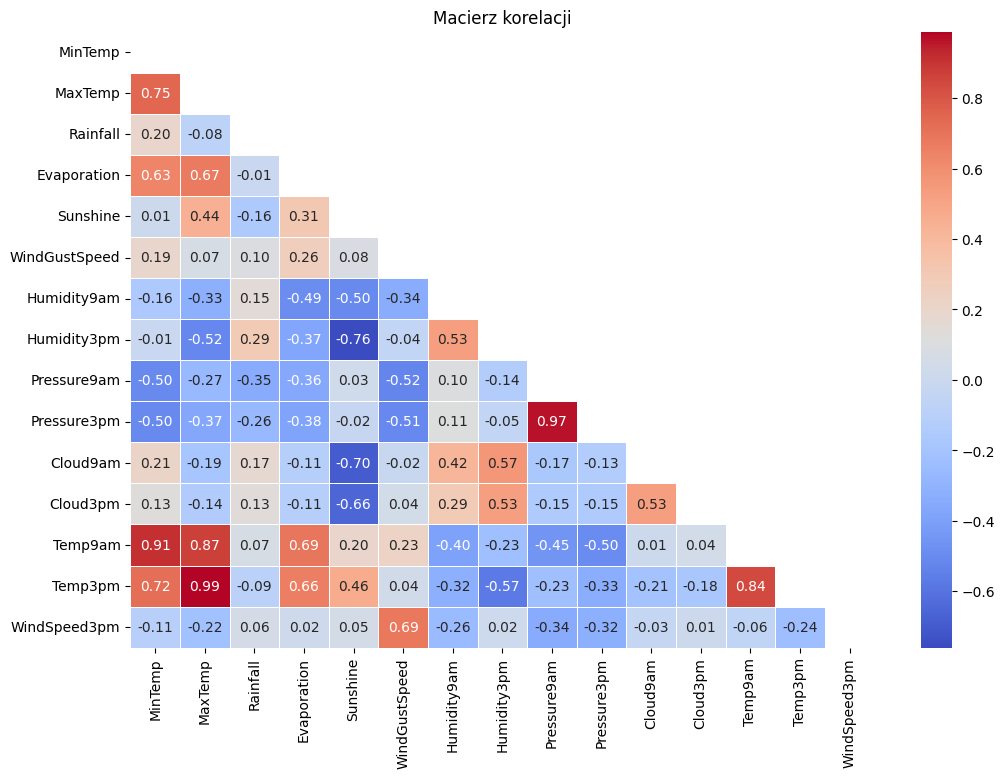

In [53]:
# Wykres korelacji między zmiennymi
plt.figure(figsize=(12, 8))
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, mask=mask)
plt.title('Macierz korelacji')
plt.show()

# Modelowanie

In [54]:
# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [55]:
# Obsługa brakujących wartości za pomocą SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [56]:
# Standaryzacja danych
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Klasyfikator Regresji Logistycznej

In [57]:
# Regresja Logistyczna
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg_model.predict(X_test_scaled)

In [58]:
# Ocena modelu Logistic Regression
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
classification_rep_log_reg = classification_report(y_test, y_pred_log_reg)

Regresja Logistyczna:
Dokładność: 0.9242424242424242
Macierz Pomyłek:
[[55  1]
 [ 4  6]]
Raport Klasyfikacji:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        56
           1       0.86      0.60      0.71        10

    accuracy                           0.92        66
   macro avg       0.89      0.79      0.83        66
weighted avg       0.92      0.92      0.92        66



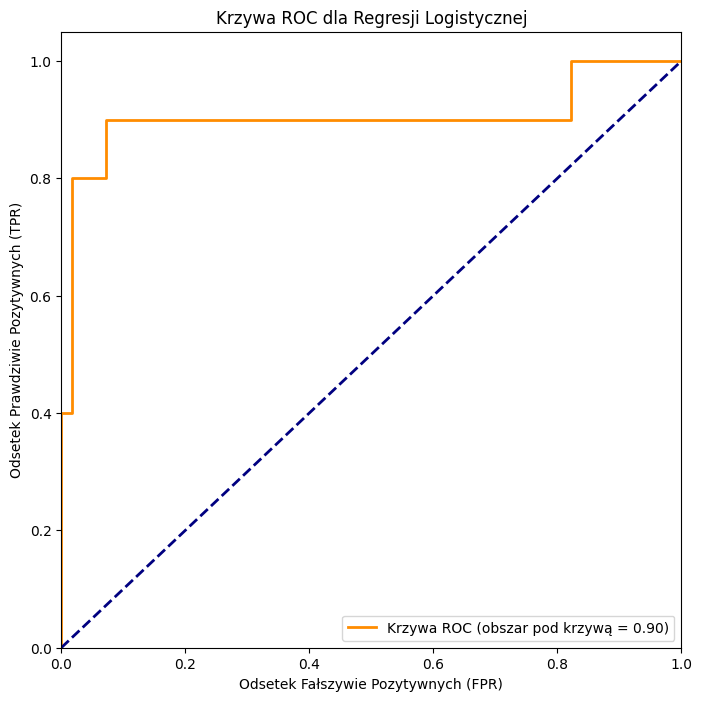

In [59]:
# Krzywa ROC dla Regresji Logistycznej
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

# Obliczenie wartości wynikowych dla danych testowych
y_scores_log_reg = log_reg_model.predict_proba(X_test_scaled)[:, 1]

# Obliczenie krzywej ROC
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test_bin, y_scores_log_reg)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

# Wyświetlenie wyników
print("Regresja Logistyczna:")
print(f'Dokładność: {accuracy_log_reg}')
print(f'Macierz Pomyłek:\n{conf_matrix_log_reg}')
print(f'Raport Klasyfikacji:\n{classification_rep_log_reg}')

# Wykres krzywej ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr_log_reg, tpr_log_reg, color='darkorange', lw=2, label='Krzywa ROC (obszar pod krzywą = {:.2f})'.format(roc_auc_log_reg))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Odsetek Fałszywie Pozytywnych (FPR)')
plt.ylabel('Odsetek Prawdziwie Pozytywnych (TPR)')
plt.title('Krzywa ROC dla Regresji Logistycznej')
plt.legend(loc="lower right")
plt.show()

# Klasyfikator Drzewa Decyzyjnego

In [60]:
# Drzewo Decyzyjne
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

In [61]:
# Ocena modelu Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)


Drzewo Decyzyjne:
Dokładność: 0.803030303030303
Macierz Pomyłek:
[[49  7]
 [ 6  4]]
Raport Klasyfikacji:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        56
           1       0.36      0.40      0.38        10

    accuracy                           0.80        66
   macro avg       0.63      0.64      0.63        66
weighted avg       0.81      0.80      0.81        66



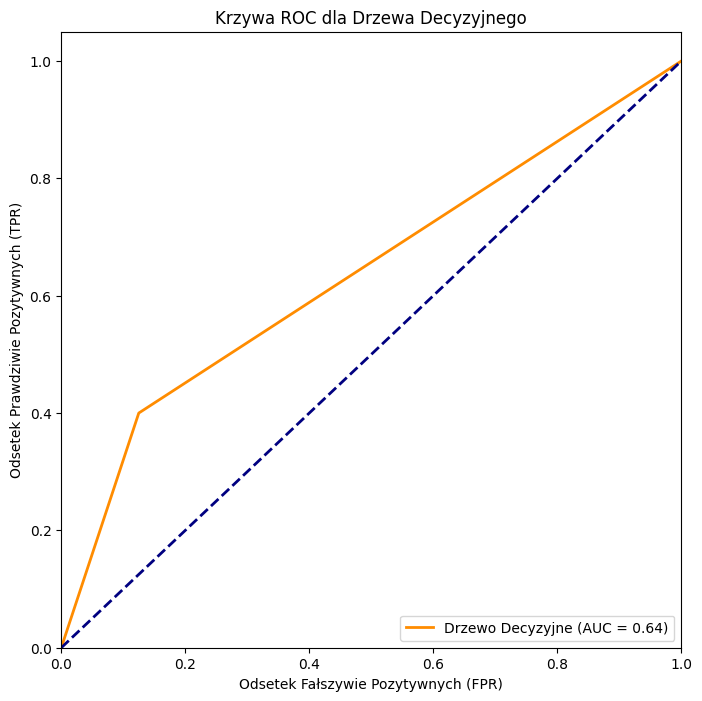

In [62]:
# Krzywa ROC dla Drzewa Decyzyjnego
y_scores_dt = dt_model.predict_proba(X_test_scaled)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_bin, y_scores_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Wyświetlenie wyników
print("\nDrzewo Decyzyjne:")
print(f'Dokładność: {accuracy_dt}')
print(f'Macierz Pomyłek:\n{conf_matrix_dt}')
print(f'Raport Klasyfikacji:\n{classification_rep_dt}')

plt.figure(figsize=(8, 8))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='Drzewo Decyzyjne (AUC = {:.2f})'.format(roc_auc_dt))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Odsetek Fałszywie Pozytywnych (FPR)')
plt.ylabel('Odsetek Prawdziwie Pozytywnych (TPR)')
plt.title('Krzywa ROC dla Drzewa Decyzyjnego')
plt.legend(loc="lower right")
plt.show()

# Klasyfikator Lasu Losowego

In [63]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

In [64]:
# Ocena modelu Lasu Losowego
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

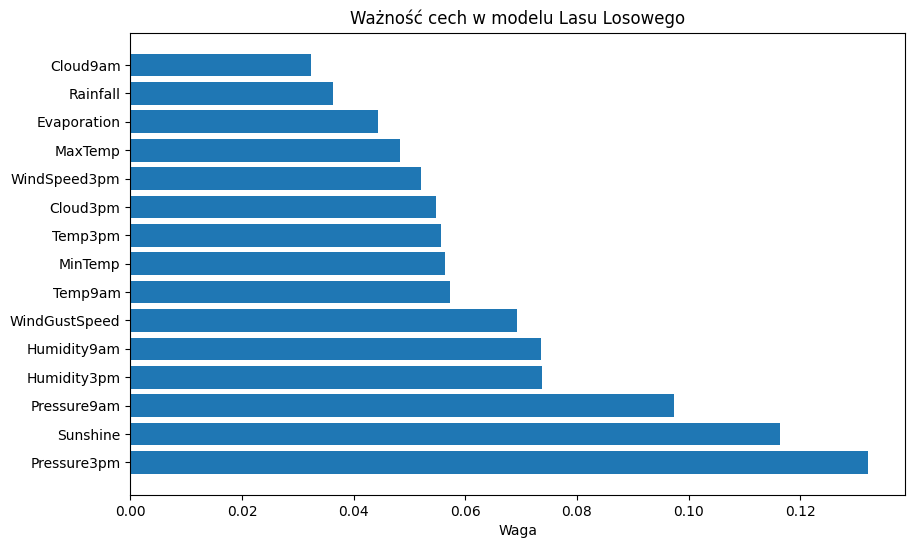

In [65]:
# Wykres ważności cech w modelu Lasu Losowego
feature_importances_rf = rf_model.feature_importances_
features_list_rf = list(features.columns)
feature_importances_df_rf = pd.DataFrame({'Cecha': features_list_rf, 'Waga': feature_importances_rf})
feature_importances_df_rf = feature_importances_df_rf.sort_values(by='Waga', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df_rf['Cecha'], feature_importances_df_rf['Waga'])
plt.xlabel('Waga')
plt.title('Ważność cech w modelu Lasu Losowego')
plt.show()


Las Losowy:
Dokładność: 0.8939393939393939
Macierz Pomyłek:
[[56  0]
 [ 7  3]]
Raport Klasyfikacji:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        56
           1       1.00      0.30      0.46        10

    accuracy                           0.89        66
   macro avg       0.94      0.65      0.70        66
weighted avg       0.91      0.89      0.87        66



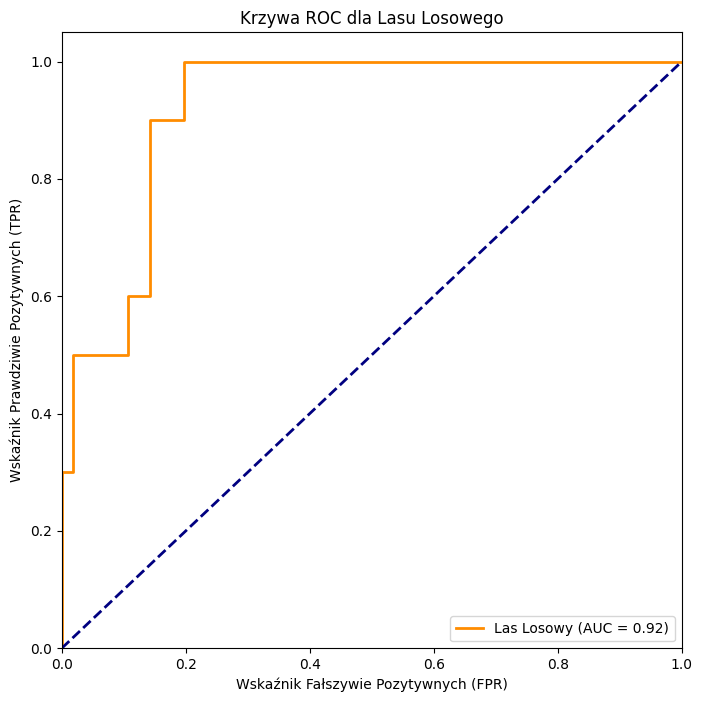

In [66]:
# Krzywa ROC dla Lasu Losowego
y_scores_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_bin, y_scores_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Wyświetlenie wyników
print("\nLas Losowy:")
print(f'Dokładność: {accuracy_rf}')
print(f'Macierz Pomyłek:\n{conf_matrix_rf}')
print(f'Raport Klasyfikacji:\n{classification_rep_rf}')

plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Las Losowy (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Wskaźnik Fałszywie Pozytywnych (FPR)')
plt.ylabel('Wskaźnik Prawdziwie Pozytywnych (TPR)')
plt.title('Krzywa ROC dla Lasu Losowego')
plt.legend(loc="lower right")
plt.show()

# Zestawienie krzywych ROC dla wszystkich trzech modeli

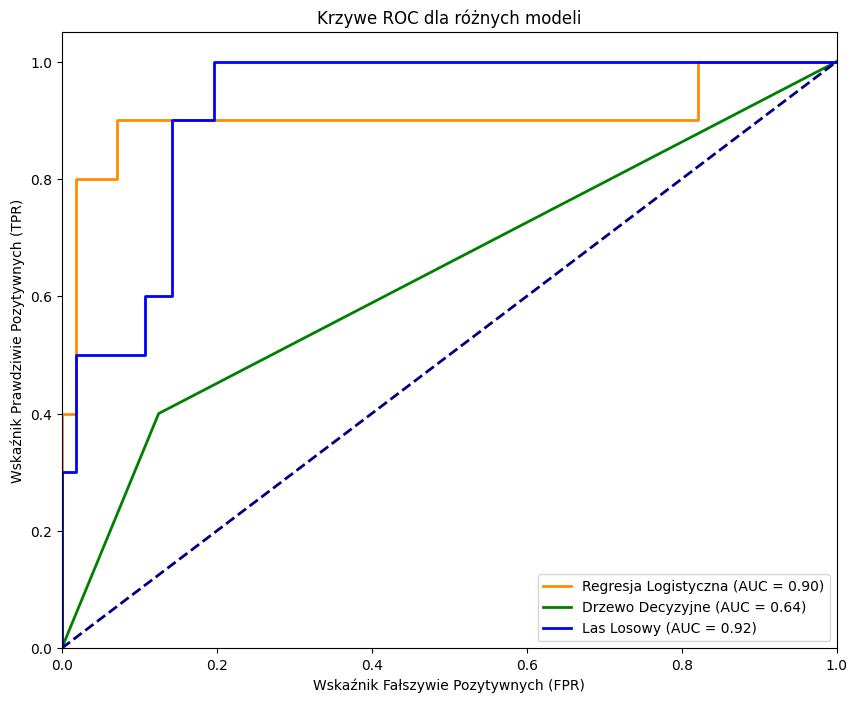

In [67]:
plt.figure(figsize=(10, 8))
plt.plot(fpr_log_reg, tpr_log_reg, color='darkorange', lw=2, label='Regresja Logistyczna (AUC = {:.2f})'.format(roc_auc_log_reg))
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label='Drzewo Decyzyjne (AUC = {:.2f})'.format(roc_auc_dt))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Las Losowy (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Wskaźnik Fałszywie Pozytywnych (FPR)')
plt.ylabel('Wskaźnik Prawdziwie Pozytywnych (TPR)')
plt.title('Krzywe ROC dla różnych modeli')
plt.legend(loc="lower right")
plt.show()